## Why XGBoost and LightGBM?
- More powerful than Random Forest, these gradient boosing models use sequential learning to correct mistakes.
- Better handling of non linearity, these models can capture complex relationships between features.
- LightGBM is optimizeed for large datasets and provides faster and more efficient training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load training data
X_train_apple = pd.read_csv("../data/tt_splits/X_train_apple.csv")
X_train_nvidia = pd.read_csv("../data/tt_splits/X_train_nvidia.csv")
X_train_microsoft = pd.read_csv("../data/tt_splits/X_train_microsoft.csv")

y_train_apple = pd.read_csv("../data/tt_splits/y_train_apple.csv")
y_train_nvidia = pd.read_csv("../data/tt_splits/y_train_nvidia.csv")
y_train_microsoft = pd.read_csv("../data/tt_splits/y_train_microsoft.csv")

# Load test data
X_test_apple = pd.read_csv("../data/tt_splits/X_test_apple.csv")
X_test_nvidia = pd.read_csv("../data/tt_splits/X_test_nvidia.csv")
X_test_microsoft = pd.read_csv("../data/tt_splits/X_test_microsoft.csv")

y_test_apple = pd.read_csv("../data/tt_splits/y_test_apple.csv")
y_test_nvidia = pd.read_csv("../data/tt_splits/y_test_nvidia.csv")
y_test_microsoft = pd.read_csv("../data/tt_splits/y_test_microsoft.csv")

In [3]:
# Ensure y values are properly formatted (flattening in case they are single-column dataframes)

y_train_apple = y_train_apple.values.ravel()
y_train_nvidia = y_train_nvidia.values.ravel()
y_train_microsoft = y_train_microsoft.values.ravel()

y_test_apple = y_test_apple.values.ravel()
y_test_nvidia = y_test_nvidia.values.ravel()
y_test_microsoft = y_test_microsoft.values.ravel()

In [4]:
# Initialize XGBoost and LightGBM models
models = {
    "XGBoost_Apple": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost_NVIDIA": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost_Microsoft": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM_Apple": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM_NVIDIA": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM_Microsoft": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Train models
models["XGBoost_Apple"].fit(X_train_apple, y_train_apple)
models["XGBoost_NVIDIA"].fit(X_train_nvidia, y_train_nvidia)
models["XGBoost_Microsoft"].fit(X_train_microsoft, y_train_microsoft)

models["LightGBM_Apple"].fit(X_train_apple, y_train_apple)
models["LightGBM_NVIDIA"].fit(X_train_nvidia, y_train_nvidia)
models["LightGBM_Microsoft"].fit(X_train_microsoft, y_train_microsoft)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 8748, number of used features: 11
[LightGBM] [Info] Start training from score 0.005660
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 5086, number of used features: 11
[LightGBM] [Info] Start training from score 0.008443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 

LGBMRegressor(random_state=42)

In [5]:
# Predictions
predictions = {
    "XGBoost_Apple": models["XGBoost_Apple"].predict(X_test_apple),
    "XGBoost_NVIDIA": models["XGBoost_NVIDIA"].predict(X_test_nvidia),
    "XGBoost_Microsoft": models["XGBoost_Microsoft"].predict(X_test_microsoft),
    "LightGBM_Apple": models["LightGBM_Apple"].predict(X_test_apple),
    "LightGBM_NVIDIA": models["LightGBM_NVIDIA"].predict(X_test_nvidia),
    "LightGBM_Microsoft": models["LightGBM_Microsoft"].predict(X_test_microsoft),
}

In [6]:
# Evaluation Metrics
metrics = {
    model: {
        "MSE": mean_squared_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "MAE": mean_absolute_error(y_test, preds),
        "R² Score": r2_score(y_test, preds),
    }
    for model, preds, y_test in zip(
        predictions.keys(),
        predictions.values(),
        [y_test_apple, y_test_nvidia, y_test_microsoft, y_test_apple, y_test_nvidia, y_test_microsoft]
    )
}

In [7]:
# Convert Metrics Dictionary to Dataframe

metrics_df = pd.DataFrame(metrics).T
metrics_df

,MSE,RMSE,MAE,R² Score
XGBoost_Apple,0.001960,0.044269,0.034993,-0.377868
XGBoost_NVIDIA,0.013658,0.116867,0.097851,-1.650749
XGBoost_Microsoft,0.001141,0.033779,0.025868,-0.011085
LightGBM_Apple,0.002659,0.051561,0.042137,-0.869218
LightGBM_NVIDIA,0.012369,0.111216,0.093503,-1.400609
LightGBM_Microsoft,0.001134,0.033669,0.025700,-0.004492


**MSE:**
- Apple: XGBoost performs slightly better than LightGBM.
- NVIDIA: LightGBM outperforms XGBoost slightly.
- Microsoft: Both models perform almost identically for Microsoft.

**MAE:**
- Apple: XGBoost has lower MAE.
- NVIDIA: LightGBM performs better.
- Microsoft: Both models perform almost identically for Microsoft.

**R Square Score:**
- Microsoft has the best R² scores (closest to 0, though still slightly negative).
- XGBoost performs better for Apple.
- LightGBM performs slightly better for NVIDIA.
- Both models are still struggling with NVIDIA, likely due to high volatility.


**Key Takeaways:**
1. XGBoost outperforms LightGBM for Apple.
- Lower RMSE, MAE, and better R² than LightGBM.

2. LightGBM slightly outperforms XGBoost for NVIDIA.
- Lower error and better R² score.
- NVIDIA remains the hardest stock to predict.

3. Microsoft's stock is the easiest to predict.
- Both XGBoost and LightGBM have similar RMSE and R² close to 0, meaning they are capturing patterns better.

4. Boosting models improve over Linear Regression & Random Forest.
- XGBoost and LightGBM perform significantly better than our previous models.
- However, the negative R² scores indicate that further improvement is needed.

Let's now visualize the predictions vs actual prices to better understand where the model fails.

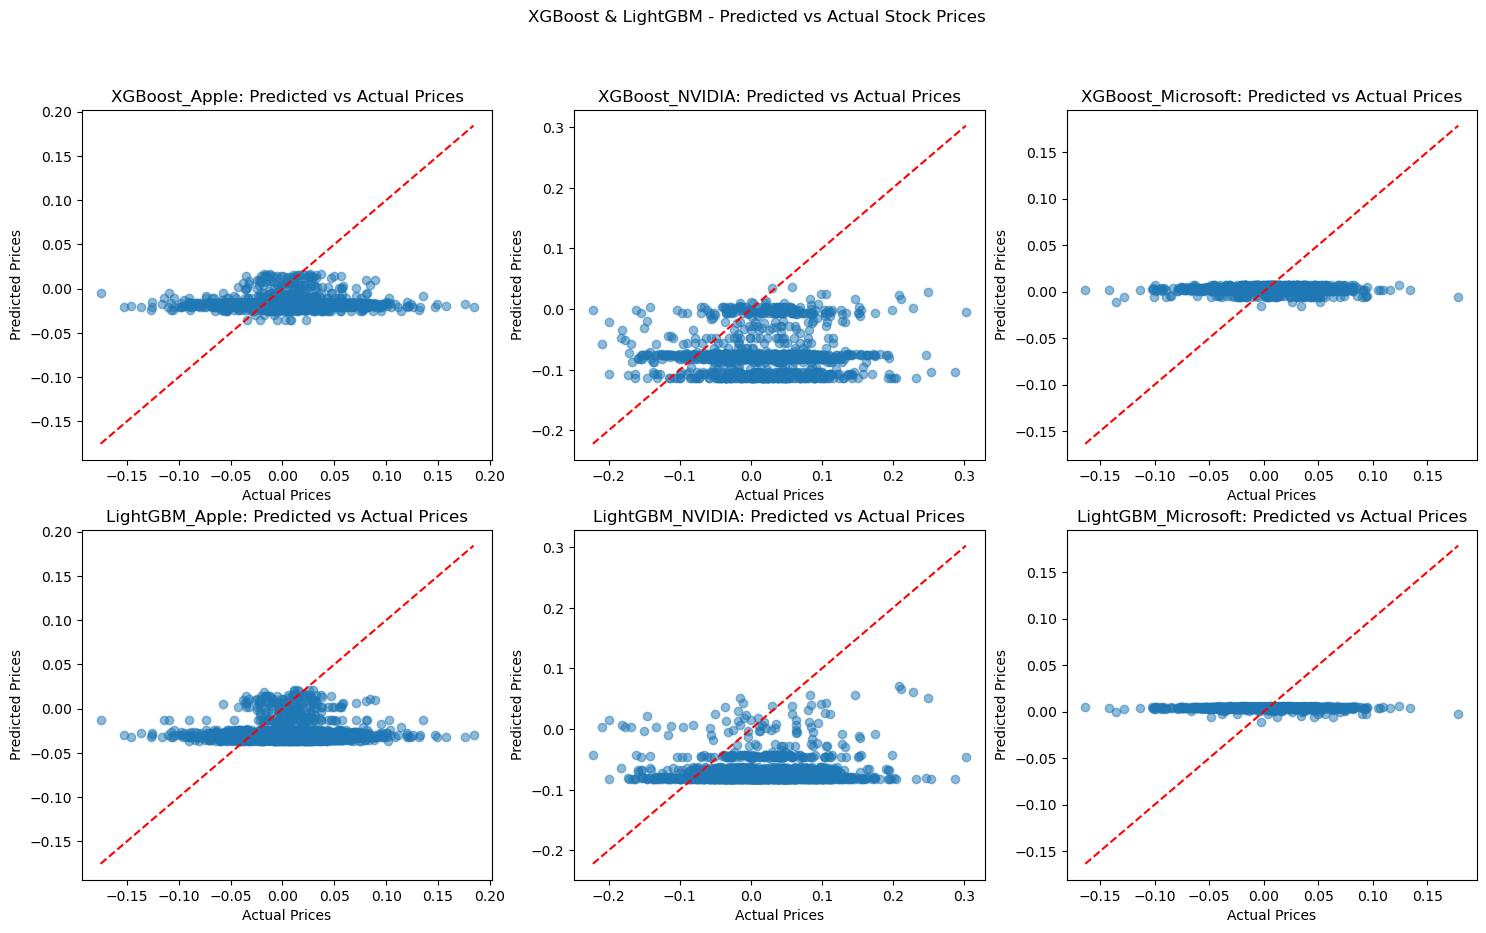

In [8]:
# Plot Predicted vs Actual Prices for each model and stock
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

models_list = ["XGBoost_Apple", "XGBoost_NVIDIA", "XGBoost_Microsoft",
               "LightGBM_Apple", "LightGBM_NVIDIA", "LightGBM_Microsoft"]

for i, (model, preds, y_test) in enumerate(zip(models_list, predictions.values(), 
                                               [y_test_apple, y_test_nvidia, y_test_microsoft, 
                                                y_test_apple, y_test_nvidia, y_test_microsoft])):
    row, col = divmod(i, 3)  
    axes[row, col].scatter(y_test, preds, alpha=0.5)
    axes[row, col].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
                        color='red', linestyle='dashed')  
    axes[row, col].set_xlabel("Actual Prices")
    axes[row, col].set_ylabel("Predicted Prices")
    axes[row, col].set_title(f"{model}: Predicted vs Actual Prices")

plt.suptitle("XGBoost & LightGBM - Predicted vs Actual Stock Prices")
plt.show()

1. Apple (XGBoost & LightGBM)
- Predictions are clustered around 0, indicating that the models are not capturing stock price fluctuations effectively.
- Predictions fail to spread across the range of actual prices.

2. NVIDIA (XGBoost & LightGBM)
- Some variance in predictions, but still shows a flat clustering near -0.1 and 0, similar to previous models.
- LightGBM appears to perform slightly better, as seen in the evaluation metrics.

3. Microsoft (XGBoost & LightGBM)
- Predictions are almost entirely flat (clustered near 0), meaning the models fail to predict significant price movements.
- Microsoft remains the most predictable stock, but XGBoost and LightGBM are not making strong predictions.

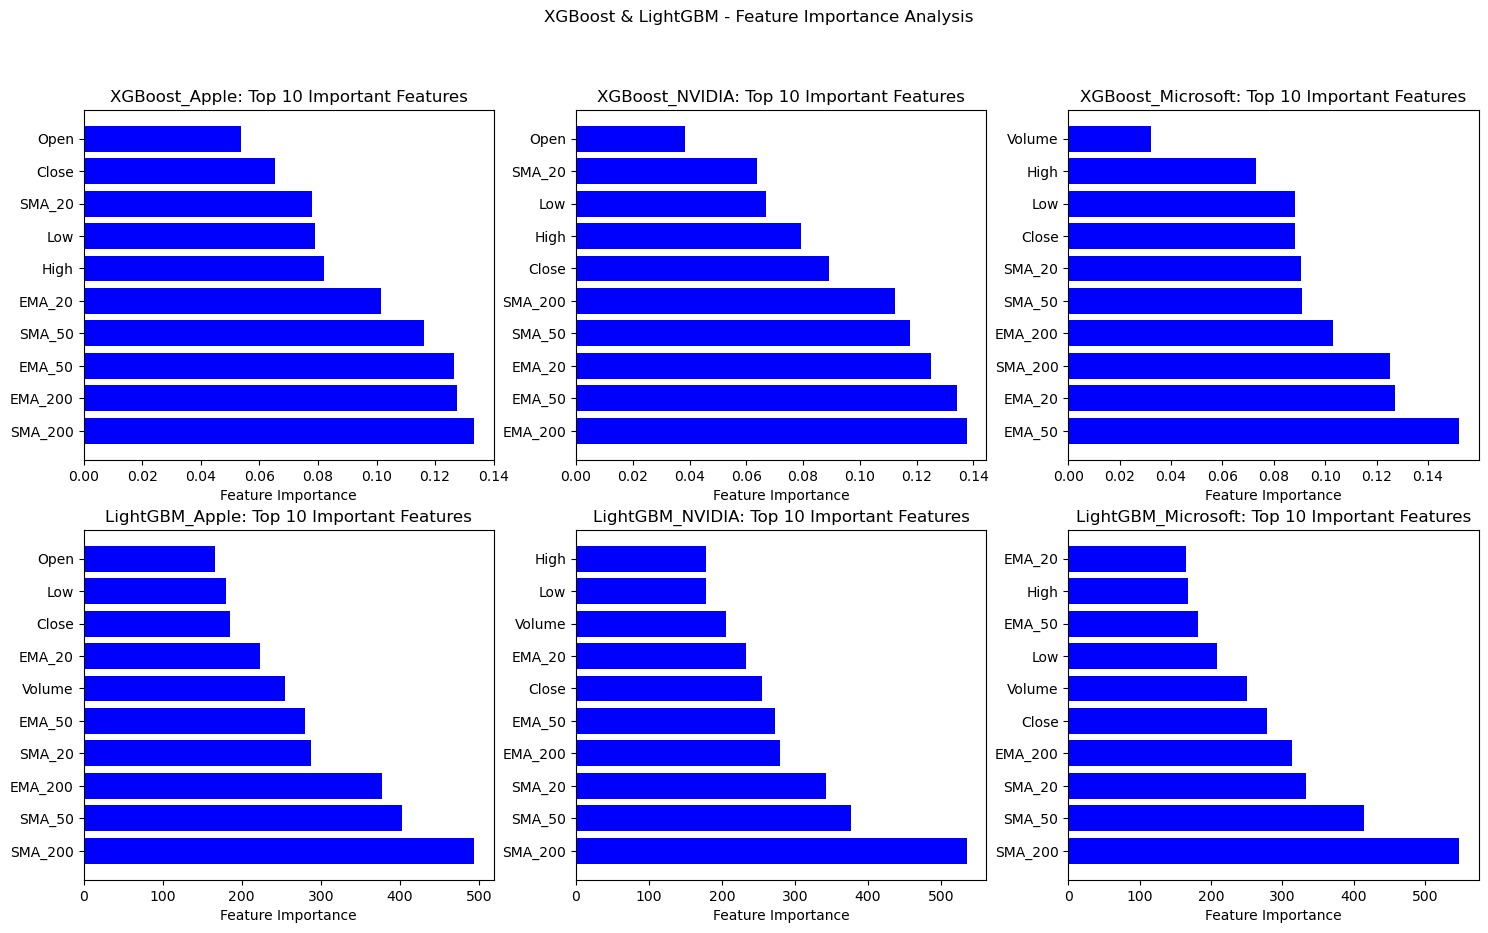

In [9]:
# Plot Feature Importance for XGBoost and LightGBM models
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, model_name in enumerate(models_list):
    model = models[model_name]
    feature_importance = model.feature_importances_
    feature_names = X_train_apple.columns  # Assuming all datasets have the same features

    sorted_idx = np.argsort(feature_importance)[::-1]  # Sort descending
    row, col = divmod(i, 3)
    
    axes[row, col].barh([feature_names[j] for j in sorted_idx[:10]], 
                         feature_importance[sorted_idx[:10]], color='blue')
    axes[row, col].set_xlabel("Feature Importance")
    axes[row, col].set_title(f"{model_name}: Top 10 Important Features")

plt.suptitle("XGBoost & LightGBM - Feature Importance Analysis")
plt.show()

1. SMA & EMA Indicators are the most influential across all stocks.
- SMA_200 and EMA_200 are the most critical features in almost all models.
- This suggests that long-term trends significantly influence stock price movements.
- SMA_50 and EMA_50 also appear in the top 5 features for all stocks.

2. Shorter-term indicators (SMA_20, EMA_20) also have some importance.
- These indicators track short-term momentum and trend direction.

3. Basic Price Features (Open, Close, High, Low) have moderate importance.
- Unlike Random Forest, where these features had minimal impact, XGBoost and LightGBM give slightly more weight to Open/Close prices.
- This suggests that price movements still play a role, but are secondary to moving averages.

4. Volume is important for Microsoft but not as much for Apple and NVIDIA.
- For Microsoft, trading volume appears in the top 10, suggesting that liquidity plays a larger role in stock movement.